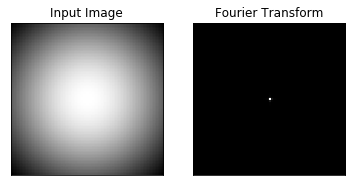

In [67]:
import numpy as np
from matplotlib import pyplot as plt

x, y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
func = np.exp(-(x**2+y**2)/2)

f = np.fft.fft2(func, norm="ortho")
fshift = np.fft.fftshift(f)

plt.subplot(121),plt.imshow(func, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(np.abs(fshift), cmap = 'gray')
plt.title('Fourier Transform'), plt.xticks([]), plt.yticks([])
plt.show()